# Census income prediction project

In this project, we aim to identify if the person earns over 50k per year or not.
The target has 2 types of categories, >50k and <=50K.

Hence this is a binary classification problem.

We have the following independent variables which help us to identify the income of the person -

- 'Age'
- 'Workclass'
- 'Fnlwgt'
- 'Education'
- 'Education_num'
- 'Marital_status'
- 'Occupation'
- 'Relationship'
- 'Race'
- 'Sex'
- 'Capital_gain'
- 'Capital_loss'
- 'Hours_per_week'
- 'Native_country'
- 'Income'

In [919]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [920]:
data = pd.read_csv('census_income.csv')

In [921]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [922]:
data.sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
2906,33,Local-gov,262042,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,1138,40,United-States,<=50K
10533,47,Private,340982,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,3103,0,40,Philippines,>50K
9182,33,Private,259931,11th,7,Separated,Machine-op-inspct,Other-relative,White,Male,0,0,30,United-States,<=50K
31898,59,Private,159008,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,56,United-States,<=50K
23918,46,Private,202560,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
20802,40,?,351161,Masters,14,Married-civ-spouse,?,Husband,White,Male,0,0,60,United-States,>50K
20559,39,Private,421633,Some-college,10,Divorced,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,<=50K
21427,19,?,218471,HS-grad,9,Never-married,?,Own-child,White,Female,0,1602,30,United-States,<=50K
15792,36,Private,76845,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,35,United-States,<=50K
32203,23,Local-gov,162551,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Female,0,0,35,China,<=50K


# Exploratory Data Analysis

We will now perform exploratory data analysis on our data.

In [923]:
#Checking number of rows and column in our dataset

data.shape

(32560, 15)

### Observation

 - Our dataset has 32560 rows and 15 columns.

In [924]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [925]:
#Checking for NaN values

data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Observation -

NaN values are not present in our data, but as we observed in the sample, we have values with '?'. We will need to replace these missing values.

In [926]:
#Exporing the Income column (target column)

data.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [927]:
data.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

### Observation

People with income less than 50k are more in number 24719 and people with income greater than 50k are significantly less (7841).

Our data is imbalanced in terms of our target variable.

In [928]:
#Checking data statistics for numerical columns

data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [929]:
#Converting the scientific format to readable format

data.describe().apply(lambda s: s.apply('{:.5f}'.format))

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.00000,32560.00000,32560.00000,32560.00000,32560.00000,32560.00000
mean,38.58163,189781.81437,10.08059,1077.61517,87.30651,40.43747
std,13.64064,105549.76492,2.57271,7385.40300,402.96612,12.34762
min,17.00000,12285.00000,1.00000,0.00000,0.00000,1.00000
25%,28.00000,117831.50000,9.00000,0.00000,0.00000,40.00000
50%,37.00000,178363.00000,10.00000,0.00000,0.00000,40.00000
75%,48.00000,237054.50000,12.00000,0.00000,0.00000,45.00000
max,90.00000,1484705.00000,16.00000,99999.00000,4356.00000,99.00000


### Observations 

- The age column has a range of 17 to 90.
- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705
- The education number has a range of 1 to 16
- The capital gain starts from 0 and ends at 99999
- The capital loss starts at 0 and ends at 4356
- Hours per week range between 1 to 99.



- There are outliers expected in Capital gain column as the values till 75% are 0.
- Same is the case with capital loss as well.
- The fnlweight column also has a huge diffence between 75% values and the max value. There is a chance of getting outliers here.

In [930]:
#Exporing the age column

data.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

In [931]:
data.Age.unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

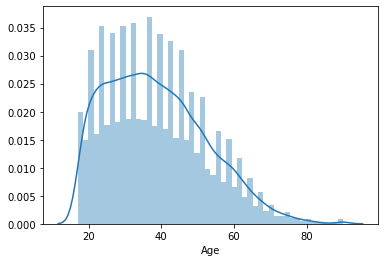

In [932]:
sns.distplot(data.Age)

### Observation - 

- There are no null values in Age column.
- The data is slightly right skewed.
- Majority of the data is spread in a range 17 - 53

In [933]:
#Exporing the workclass column

data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [934]:
data.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

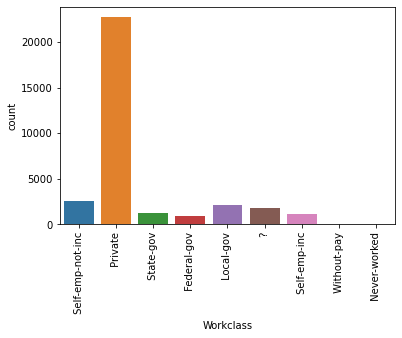

In [935]:
sns.countplot(data.Workclass)
plt.xticks(rotation = 90)

In [936]:
data[data.Workclass == ' ?' ]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


### Observations -

- The maximum data has Workclass as Private, and minimum are Never-worked
- The data contains null values classified as '?'.
- It is observed that wherever Workclass is ?, occupation is also ?
- There are 1836 missing values which we need to handle.
- There are 8 types of Workclasses, excluding ?

In [937]:
#Exploring the education column

data.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [938]:
data.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

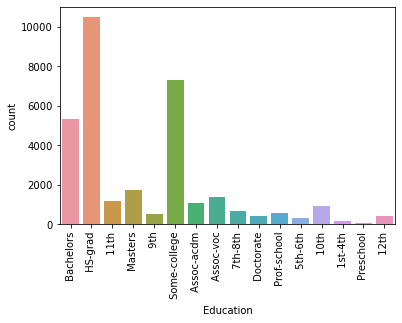

In [939]:
sns.countplot(data.Education)
plt.xticks(rotation = 90)

### Observations -

- There are 16 different categories of education 
- The highest number of values have education as HS_Grad and minimum are Pre-school
- There are no missing values in the Education column

In [940]:
#Exploring the education num column

data.Education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [941]:
data.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

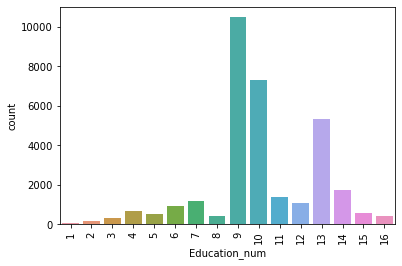

In [942]:
sns.countplot(data.Education_num)
plt.xticks(rotation = 90)

### Observation -

- The education num column is signifying the Education column in a numerical manner.
- The count for all different types of educations is same.


In [943]:
#Exploring the Marital Status column

data.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [944]:
data.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

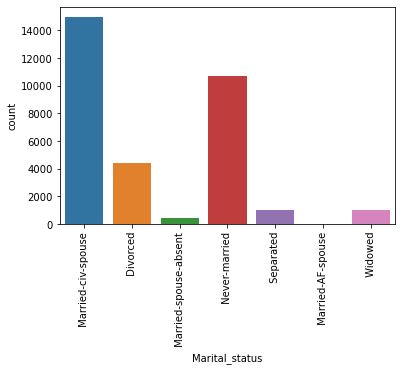

In [945]:
sns.countplot(data.Marital_status)
plt.xticks(rotation = 90)

### Observation -

- The marital status column has 7 categories
- The highest number of people have marital status as Married-civ-spouse, whereas lowest values are Married-AF-spouse.
- The data has no missing values

In [946]:
# Exporing the occupation column

data.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [947]:
data.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [948]:
data[data.Occupation == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [949]:
#Checking which data has additional ? values in occupation other than workclass == ?

df = data[data.Occupation == ' ?']
df[df.Workclass != ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5360,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14771,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20336,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23231,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32313,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

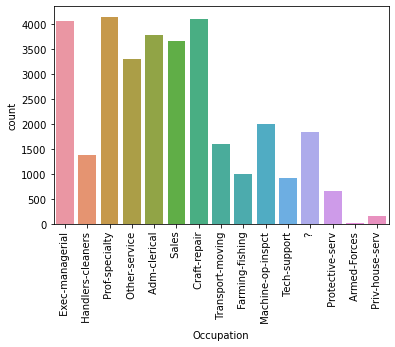

In [950]:
sns.countplot(data.Occupation)
plt.xticks(rotation = 90)

### Observation 

- There are missing values in occupation column, and have workclass also missing
- Number of missing values = 1843, which are slightly higher than Workclass
- The distribution among top occupations are quite similar in numbers (~4000)
- The people who have workclass as never worked have an occupation ? as an addition
- There are 14 categories in Occupation column, excluding ?


In [951]:
#Exploring the Relationship column

data.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [952]:
data.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

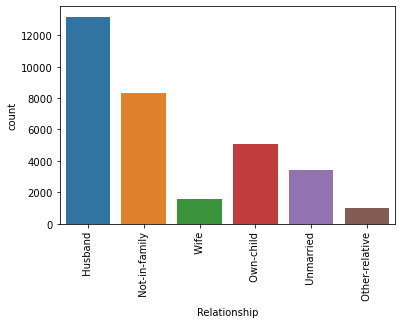

In [953]:
sns.countplot(data.Relationship)
plt.xticks(rotation = 90)

### Observation 

- Relationship column has no missing values
- Relationship column has 6 categories of data
- The Husband relationship is the most recurring relationship

In [954]:
#Exploring the Race column

data.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [955]:
data.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

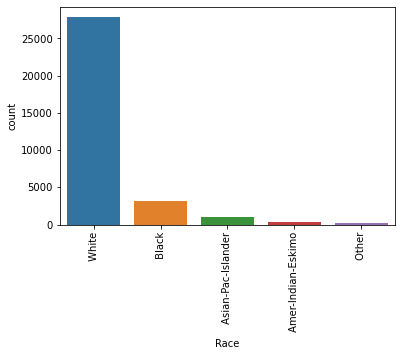

In [956]:
sns.countplot(data.Race)
plt.xticks(rotation = 90)

### Observations -

- Race column has 5 categories and no missing values
- The highest number of people are white and rest of the numbers are significantly less

In [957]:
# Exporing the Sex column

data.Sex.unique()

array([' Male', ' Female'], dtype=object)

In [958]:
data.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

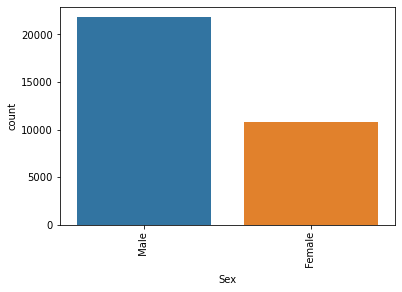

In [959]:
sns.countplot(data.Sex)
plt.xticks(rotation = 90)

### Observations 

- Males have a higher number than Females (2:1 ratio approximately)
- Sex column has 2 values only, male and female, and has no missing values 

In [960]:
#Exploring the Capital gain column

data.Capital_gain.unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [961]:
len(data.Capital_gain.unique())

119

In [962]:
data.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [963]:
data[data.Capital_gain != 0].sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
8145,23,Private,222925,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,2105,0,40,United-States,<=50K
28053,34,Private,49469,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,99999,0,50,United-States,>50K
3226,39,Private,129597,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,3464,0,40,United-States,<=50K
30362,69,Private,197080,12th,8,Married-civ-spouse,Transport-moving,Husband,White,Male,9386,0,60,United-States,>50K
10672,71,?,35303,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,9386,0,30,United-States,>50K
21680,34,Private,209101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,55,United-States,>50K
6415,74,Private,129879,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,15831,0,40,United-States,>50K
30727,65,Private,170939,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,6723,0,40,United-States,<=50K
5294,30,Private,137606,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5013,0,40,United-States,<=50K
11753,69,Private,36956,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,50,United-States,>50K


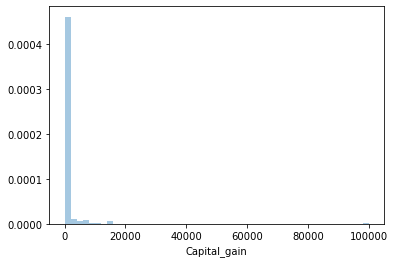

In [964]:
sns.distplot(data.Capital_gain)

### Observation 

- There are 29849 rows where capital gain = 0.
- There are 2711 rows where capital gain has a non-zero value
- Capital gain has 119 unique values

In [965]:
#Exploring the capital loss column

data.Capital_loss.unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [966]:
len(data.Capital_loss.unique())

92

In [967]:
data.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

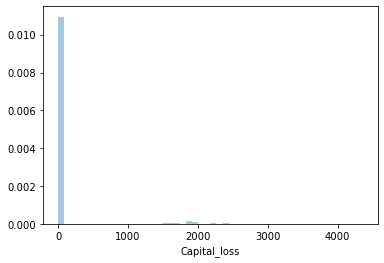

In [968]:
sns.distplot(data.Capital_loss)

### Observations 

- There are 31041 rows where capital loss is set to 0.
- The capital loss column has 92 unique values

In [969]:
#Exploring the hours per week column

data.Hours_per_week.unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [970]:
data.Hours_per_week.value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64

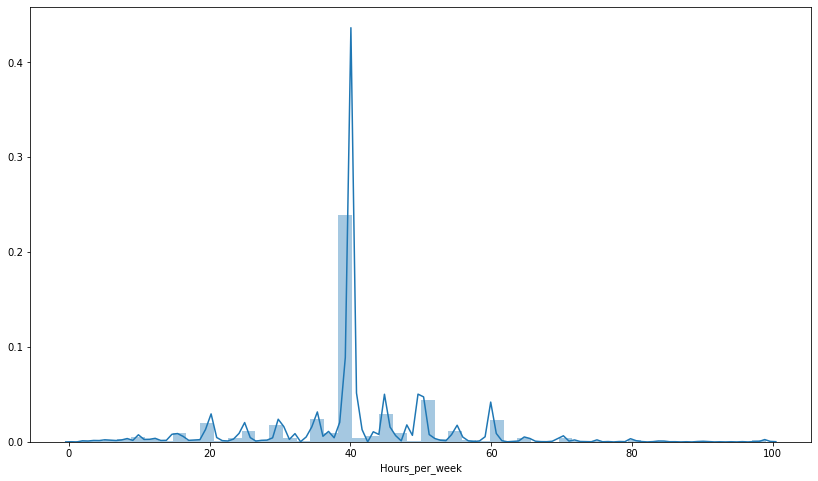

In [971]:
plt.figure(figsize=(14,8))
sns.distplot(data.Hours_per_week)
            

### Observation 

- People with 40 hours per week have the highest count (15216)
- Majority of the people have hours per week with 20 - 60, rest of the values are quite less.


In [972]:
#Exploring the Native country column

data.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [973]:
data.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

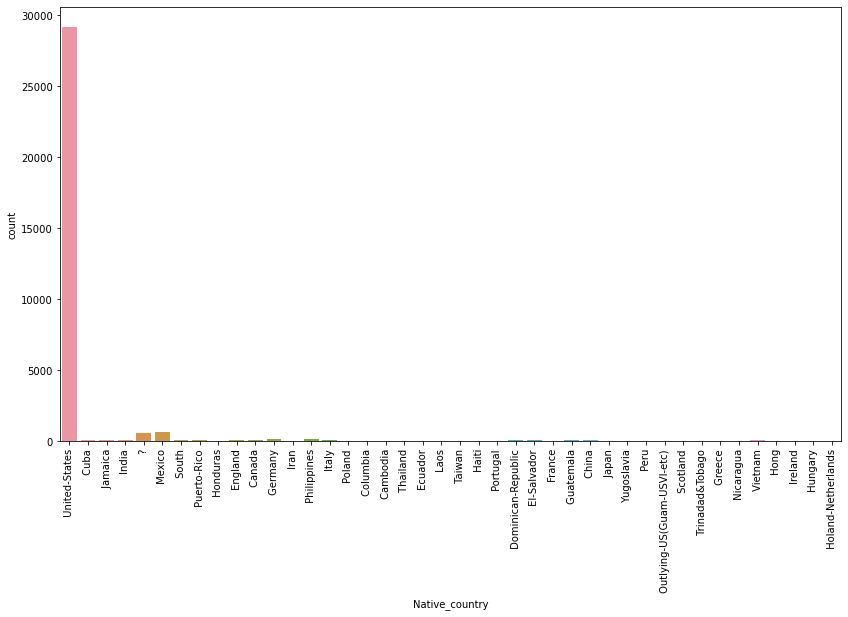

In [974]:
plt.figure(figsize=(14,8))
sns.countplot(data.Native_country)
plt.xticks(rotation = 90)

### Observation -

- Majority of the count has Native_country as US
- Rest of the countries have quite low counts
- There are missing values in the set (583) which are categorized as ?

## Bivariate and multivariate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

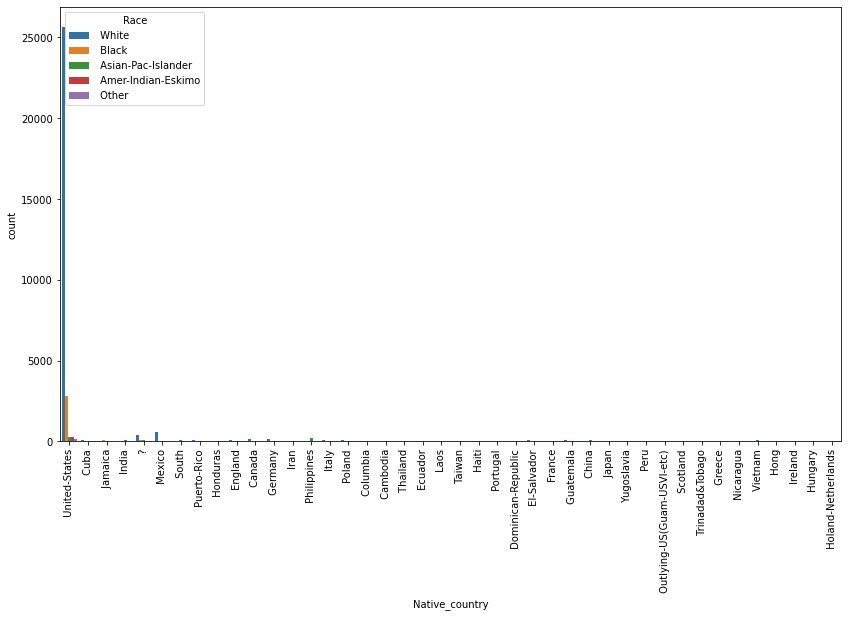

In [975]:
# Relationship between Native Country and Race columns
plt.figure(figsize= (14,8))
sns.countplot(data['Native_country'], hue=data['Race'])
plt.xticks(rotation = 90)

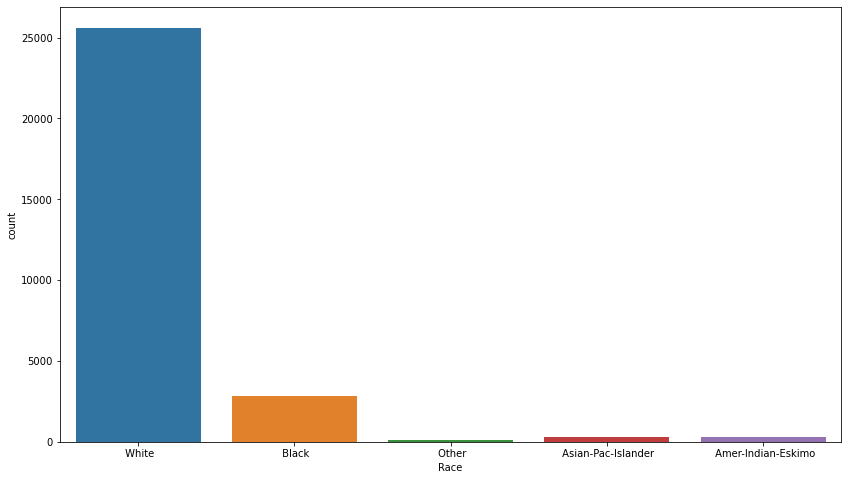

In [976]:
# Relationship between Native Country and Race columns
us_data = data[data['Native_country']==' United-States']

plt.figure(figsize= (14,8))
sns.countplot(us_data['Race'])

### Observation 

- Majority of the people in US are Whites, other races are significantly low. Black still have a considerable number as compared to rest.

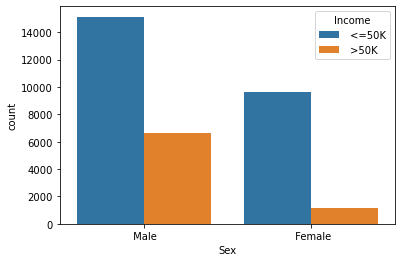

In [977]:
# Checking relationship between income and gender

sns.countplot(data['Sex'], hue = data['Income'] )

### Observation

Males have a higher chance of having income more than 50K than women

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

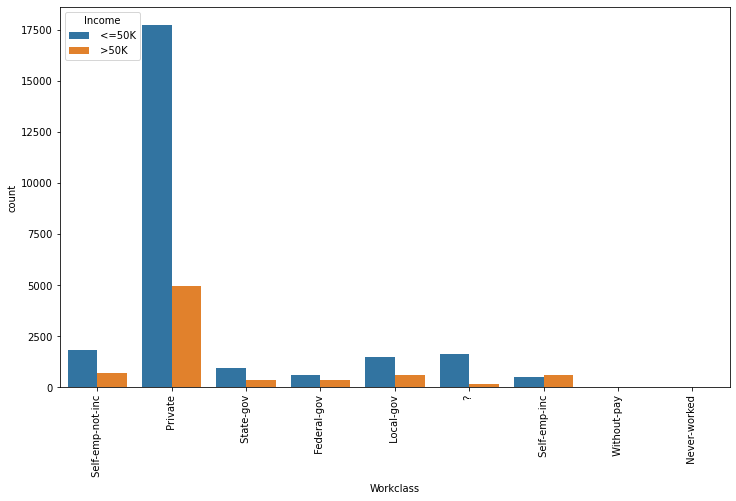

In [978]:
# Checking relationship between income and Workclass

plt.figure(figsize = (12,7))
sns.countplot(data['Workclass'], hue = data['Income'])
plt.xticks(rotation = 90)

### Observation -

- Highest number of people having income more than 50K belong to Private class.
- The people in category 'Self-emp-inc' have more number of hugh earners than the low earners (<50K)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

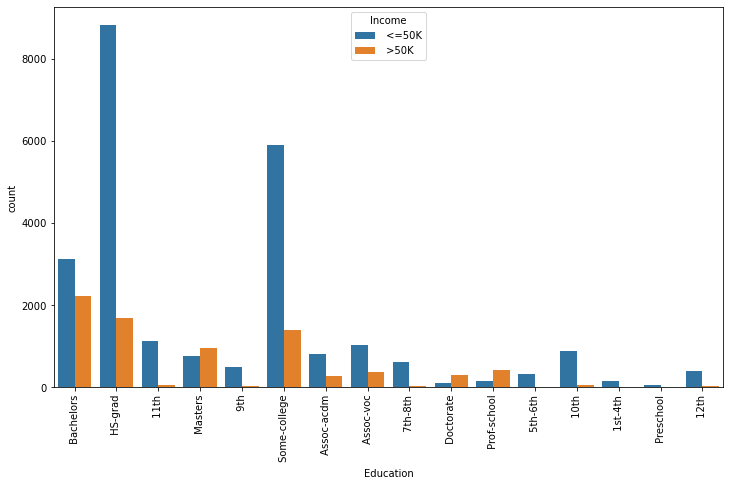

In [979]:
#Checking income relation with education

plt.figure(figsize = (12,7))
sns.countplot(data['Education'], hue = data['Income'])
plt.xticks(rotation = 90)

### Observation 

- Bachelors have a high chance of having income more than 50k
- Number of people having doctorate and prof-school have higher number of high earners than low earners (<50k)
- The categories which imply school have minimum chance of getting higher than 50k
- College and HS grad have same ratio of less than 50K to more than 50K

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

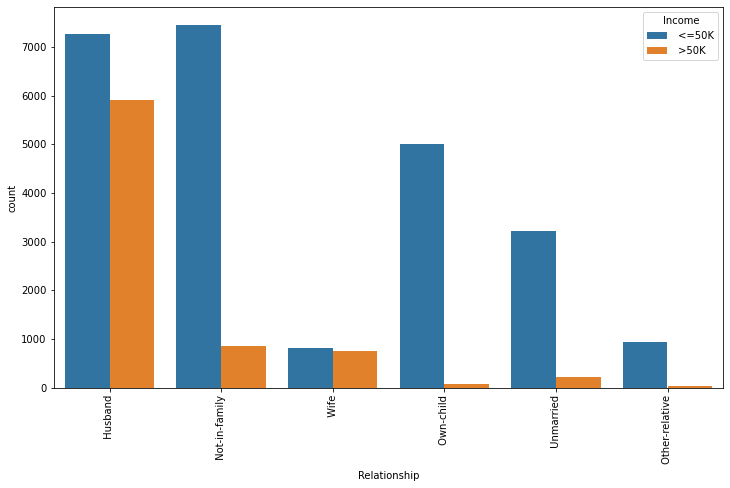

In [980]:
# Checking relationship connection with income

plt.figure(figsize = (12,7))
sns.countplot(data['Relationship'], hue = data['Income'])
plt.xticks(rotation = 90)

### Observation

- Maximum chances of wife to have income more than 50k
- Husband relation also has a high chance of getting income more than 50k
- Rest of the relations have very less chances to be more than 50k 

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Text major ticklabel objects>)

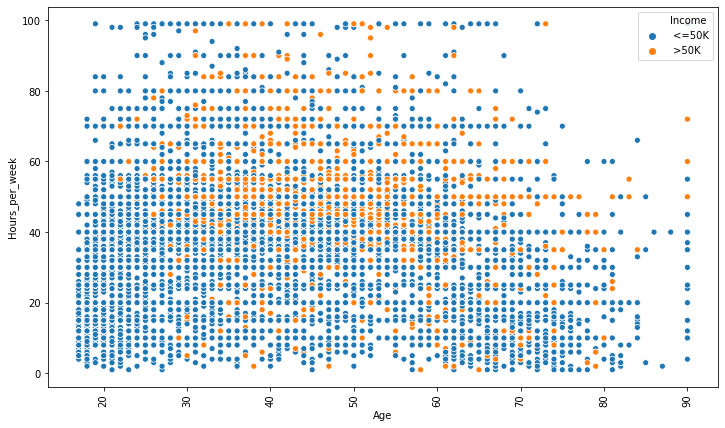

In [981]:
#Checking relation between age and income

plt.figure(figsize = (12,7))
sns.scatterplot(x = data['Age'], y = data['Hours_per_week'], hue=data['Income'])
plt.xticks(rotation = 90)

### Observation

- People below 28 need to work above 50 hours per week to get chance to be more than 50k, people below 28 working less than 40 hours have no chance to be more than 50K earner.
- Majority of high earners work for more than 40h.
- Number of work hours decrease after the age of 65, along with >50k earners
- People working more than 60 hours per week keep on decreasing as the number of hours increase.

In [982]:
#Changing values in income column

data.Income = data.Income.replace(' >50K', 1)

data.Income = data.Income.replace(' <=50K', 0)

In [983]:
#Checking correlations 

data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


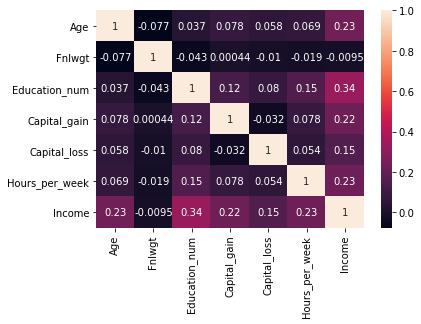

In [984]:
sns.heatmap(data.corr(), annot = True)

### Observation

- Income has highest correlation with Education-num (34%)
- Income has correlation with capital gain, hours per week and Age (22%, 23% and 23% respectively)
- Income has negative correlation with Fnlwgt

# Data modeling

We will first fill up this missing values in various columns ' ?'

In [985]:
#Filling the values in Workplace, Occupation, Native-country column using the most frequent values 

data['Workclass'] = data['Workclass'].replace(' ?', ' Private')
data['Occupation'] = data['Occupation'].replace(' ?', ' Prof-specialty')
data['Native_country'] = data['Native_country'].replace(' ?',  ' United-States')

In [986]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [987]:
# Combining data in Workclass column in a meaningful manner

data.Workclass = data.Workclass.replace(' Never-worked', ' Without-pay')
data.Workclass = data.Workclass.replace(' State-gov', ' Gov')
data.Workclass = data.Workclass.replace(' Local-gov', ' Gov')
data.Workclass = data.Workclass.replace(' Self-emp-not-inc', ' Private')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

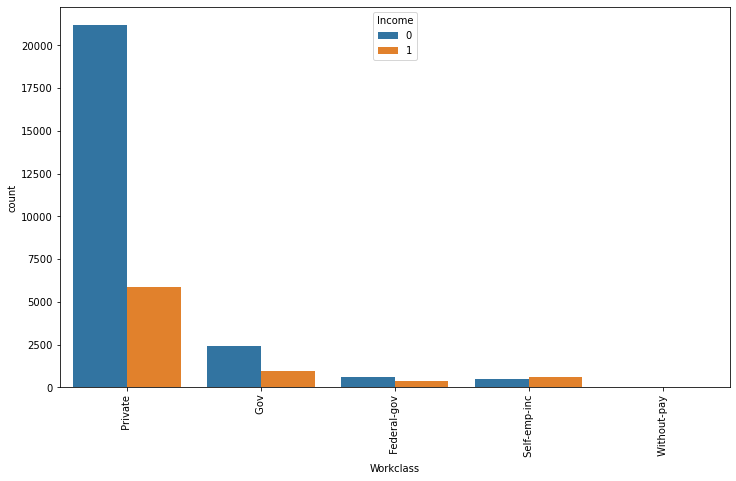

In [988]:
plt.figure(figsize = (12,7))
sns.countplot(data['Workclass'], hue = data['Income'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

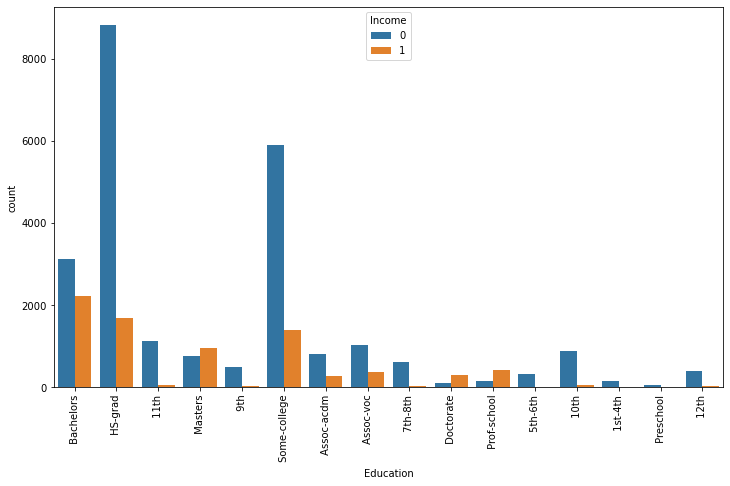

In [989]:
# Combining data in Education in a meaningful manner 

plt.figure(figsize = (12,7))
sns.countplot(data['Education'], hue = data['Income'])
plt.xticks(rotation = 90)

In [990]:
data.Education = data.Education.replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'], ' School')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

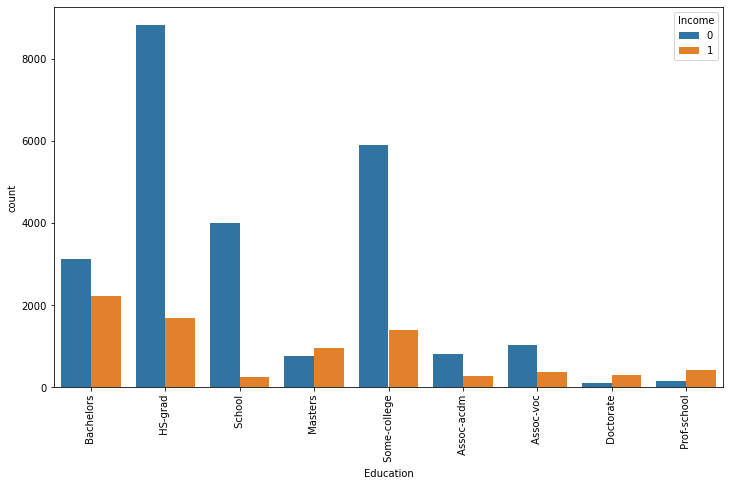

In [991]:
plt.figure(figsize = (12,7))
sns.countplot(data['Education'], hue = data['Income'])
plt.xticks(rotation = 90)

In [992]:
data.Education = data.Education.replace([' Doctorate',' Prof-school'], ' Doctorate')
data.Education = data.Education.replace([' Assoc-acdm',' Assoc-voc'], ' Assoc')
data.Education = data.Education.replace([' HS-grad',' Some-college'], ' College')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

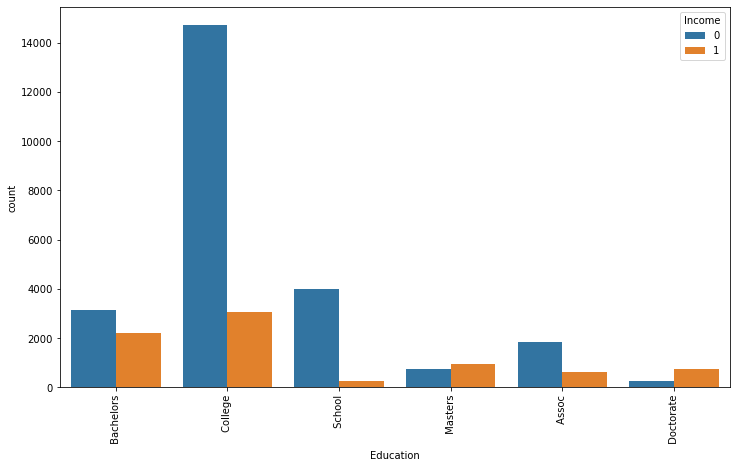

In [993]:
plt.figure(figsize = (12,7))
sns.countplot(data['Education'], hue = data['Income'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

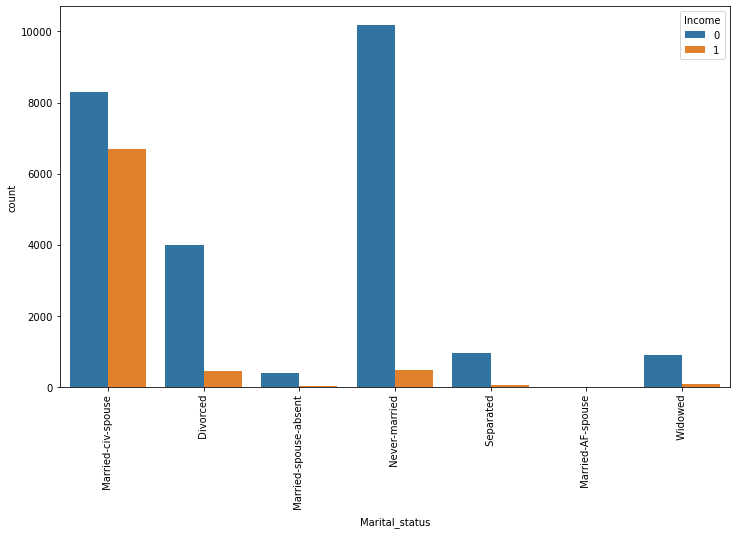

In [994]:
# Converting MaritalStatus into meaninful data

plt.figure(figsize = (12,7))
sns.countplot(data['Marital_status'], hue = data['Income'])
plt.xticks(rotation = 90)

In [995]:
data.Marital_status = data.Marital_status.replace([' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed', ' Married-AF-spouse'], ' No spouse')


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

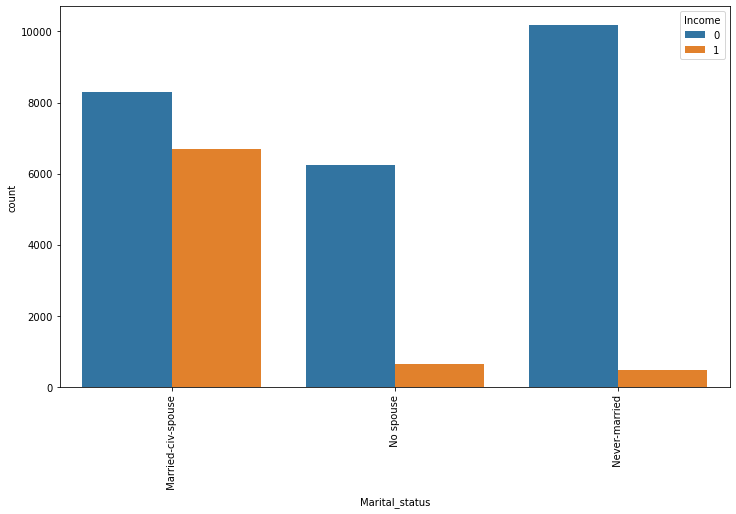

In [996]:

plt.figure(figsize = (12,7))
sns.countplot(data['Marital_status'], hue = data['Income'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

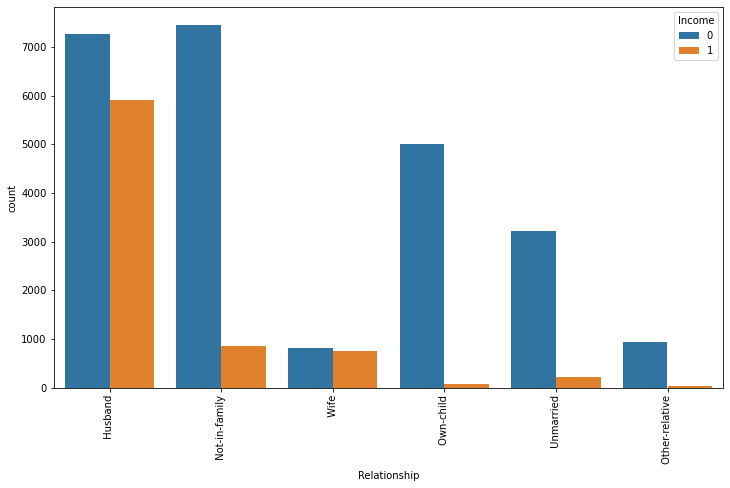

In [997]:
# Converting Relationship into meaningful data

plt.figure(figsize = (12,7))
sns.countplot(data['Relationship'], hue = data['Income'])
plt.xticks(rotation = 90)

In [998]:
data.Relationship = data.Relationship.replace([' Not-in-family', ' Own-child', ' Unmarried', ' Other-relative'], 'Others')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

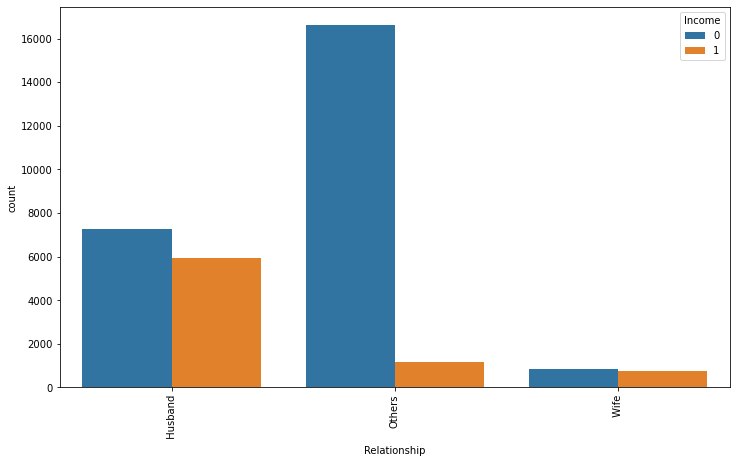

In [999]:
plt.figure(figsize = (12,7))
sns.countplot(data['Relationship'], hue = data['Income'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

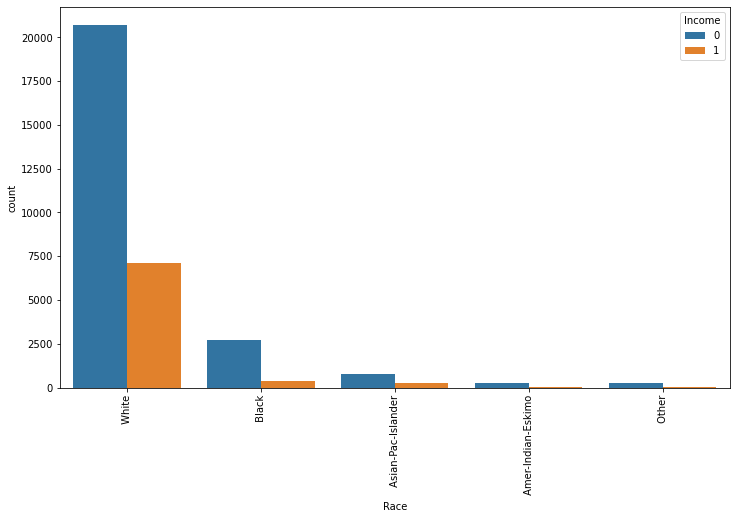

In [1000]:
# Converting Race into lesser but meaningful categories

plt.figure(figsize = (12,7))
sns.countplot(data['Race'], hue = data['Income'])
plt.xticks(rotation = 90)

In [1001]:
data.Race = data.Race.replace([' Amer-Indian-Eskimo', ' Other'], ' Others')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

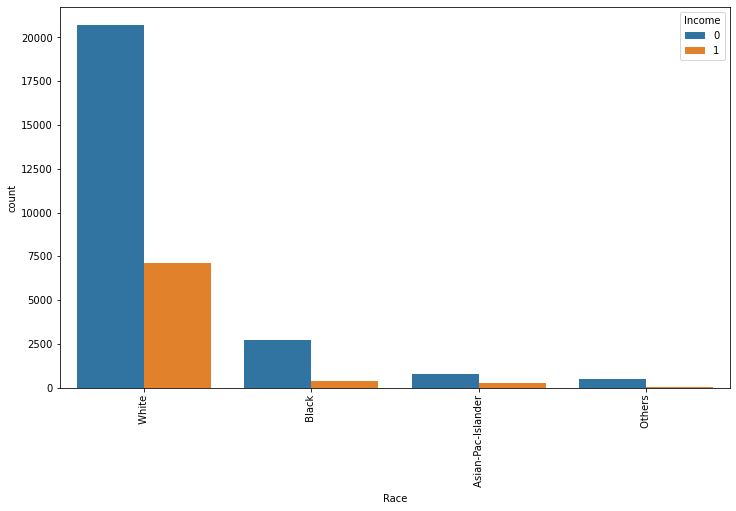

In [1002]:
plt.figure(figsize = (12,7))
sns.countplot(data['Race'], hue = data['Income'])
plt.xticks(rotation = 90)

# Outlier detection

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

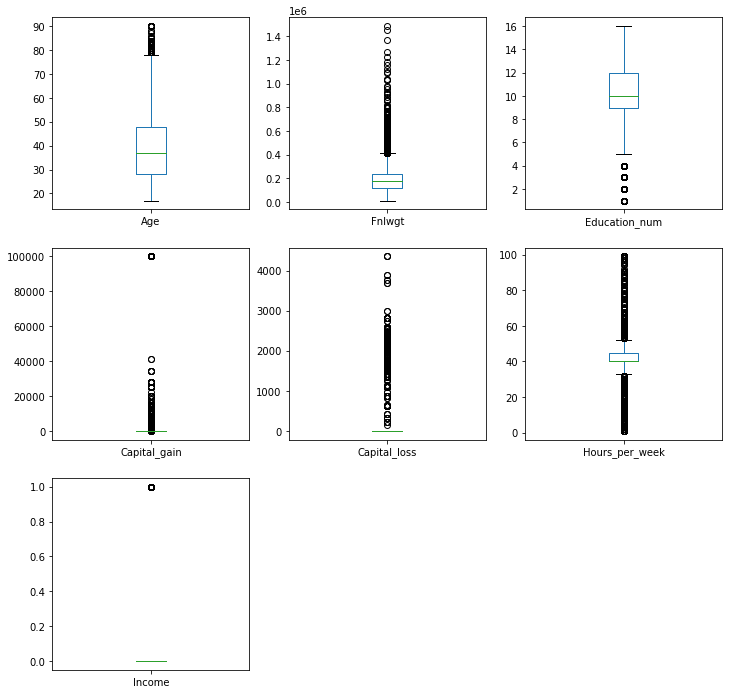

In [1003]:
#Plotting boxplot for looking at the outliers

data.plot(kind = 'box', layout = (3,3), sharex = False, subplots = True, figsize = (12,12))

Observation -

We see outliers in almost all of the columns

In [1004]:
from scipy.stats import zscore

In [1005]:
zs = zscore(data[['Age','Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']])

In [1006]:
data[((abs(zs)<3).all(axis=1))]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Private,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,College,9,No spouse,Handlers-cleaners,Others,White,Male,0,0,40,United-States,0
2,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,College,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,College,9,No spouse,Adm-clerical,Others,White,Female,0,0,40,United-States,0
32558,22,Private,201490,College,9,Never-married,Adm-clerical,Others,White,Male,0,0,20,United-States,0


In [1007]:
32560 - 29827

2733

By removing the outliers, we will be losing 2733 rows from our data.

In [1008]:
data_wo_outlier = data[((abs(zs)<3).all(axis=1))==False]

In [1009]:
data_wo_outlier['Income'].value_counts()

0    1546
1    1187
Name: Income, dtype: int64

If we drop the outliers, we will be dropping around 14% of the rows which have income greater than 50k, hence we choose not to drop the outliers data.

# Skewness treatment

In [1010]:
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

We will be treating the Fnlwgt, Capital_gain and Capital_loss column for skewness.

We will use sqrt transform since it contains 0 values.

In [1011]:
data['Fnlwgt'] = np.sqrt(data['Fnlwgt'])

In [1012]:
data.skew()

Age                0.558738
Fnlwgt             0.189066
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [1013]:
#Treating Capital gain and loss columns using cbrt since the skewness values are quite high

data['Capital_gain'] = np.cbrt(data['Capital_gain'])
data['Capital_loss'] = np.cbrt(data['Capital_loss'])

In [1014]:
data.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Income            1.212383
dtype: float64

In [1015]:
#Applying cbrt again to decrease skewness

data['Capital_gain'] = np.cbrt(data['Capital_gain'])
data['Capital_loss'] = np.cbrt(data['Capital_loss'])

In [1016]:
data.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      3.103182
Capital_loss      4.304693
Hours_per_week    0.227636
Income            1.212383
dtype: float64

We see no major impact by treating skewness further, so we will continue further with the received skewness.

# Encoding the categorical data

In [1017]:
from sklearn.preprocessing import LabelEncoder

In [1018]:
le = LabelEncoder()

In [1019]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [1020]:
data['Workclass'] = le.fit_transform(data['Workclass'])
data['Education'] = le.fit_transform(data['Education'])
data['Marital_status'] = le.fit_transform(data['Marital_status'])
data['Occupation'] = le.fit_transform(data['Occupation'])
data['Relationship'] = le.fit_transform(data['Relationship'])
data['Native_country'] = le.fit_transform(data['Native_country'])
data['Race'] = le.fit_transform(data['Race'])
data['Sex'] = le.fit_transform(data['Sex'])

In [1021]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,2,288.636450,1,13,0,3,0,3,1,0.000000,0.0,13,38,0
1,38,2,464.377002,2,9,2,5,2,3,1,0.000000,0.0,40,38,0
2,53,2,484.480134,5,7,0,5,0,1,1,0.000000,0.0,40,38,0
3,28,2,581.729318,1,13,0,9,1,1,0,0.000000,0.0,40,4,0
4,37,2,533.462276,4,14,0,3,1,3,0,0.000000,0.0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,507.249446,0,12,0,12,1,3,0,0.000000,0.0,38,38,0
32556,40,2,392.904569,2,9,0,6,0,3,1,0.000000,0.0,40,38,1
32557,58,2,389.756334,2,9,2,0,2,3,0,0.000000,0.0,40,38,0
32558,22,2,448.876375,2,9,1,0,2,3,1,0.000000,0.0,20,38,0


# Standard Scaling

In [1022]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [1023]:
#Dividing the dataset into independent and dependent data before scaling

ds_x = data.drop('Income', axis = 'columns')
y = data['Income']

In [1024]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [1025]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,0.258873,-1.088506,-0.895004,1.134779,-0.962526,-0.790156,-1.182477,0.395875,0.703087,-0.299132,-0.221128,-2.222120,0.261374
1,-0.042640,0.258873,0.380193,-0.157286,-0.420027,1.597292,-0.286703,0.889387,0.395875,0.703087,-0.299132,-0.221128,-0.035430,0.261374
2,1.057031,0.258873,0.548199,2.055867,-1.197429,-0.962526,-0.286703,-1.182477,-2.195802,0.703087,-0.299132,-0.221128,-0.035430,0.261374
3,-0.775755,0.258873,1.360929,-0.895004,1.134779,-0.962526,0.720204,-0.146545,-2.195802,-1.422298,-0.299132,-0.221128,-0.035430,-5.352855
4,-0.115952,0.258873,0.957552,1.318149,1.523480,-0.962526,-0.790156,-0.146545,0.395875,-1.422298,-0.299132,-0.221128,-0.035430,0.261374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.258873,0.738486,-1.632722,0.746077,-0.962526,1.475385,-0.146545,0.395875,-1.422298,-0.299132,-0.221128,-0.197407,0.261374
32556,0.103982,0.258873,-0.217117,-0.157286,-0.420027,-0.962526,-0.034976,-1.182477,0.395875,0.703087,-0.299132,-0.221128,-0.035430,0.261374
32557,1.423589,0.258873,-0.243427,-0.157286,-0.420027,1.597292,-1.545336,0.889387,0.395875,-1.422298,-0.299132,-0.221128,-0.035430,0.261374
32558,-1.215624,0.258873,0.250651,-0.157286,-0.420027,0.317383,-1.545336,0.889387,0.395875,0.703087,-0.299132,-0.221128,-1.655200,0.261374


In [1026]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

We have successfully scaled our data

# Fitting the classification model

In [1027]:
#Importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1028]:
#Creating instances for classification models

dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
lg = LogisticRegression()

In [1029]:
#Fitting models and checking for classification metrics

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11)
for i in [dt, gnb, svc, knn, lg]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = accuracy_score(y_test, pred)
    train_score = accuracy_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.01:
        print(i)
        print('Accuracy score for train data ', accuracy_score(y_test, pred))
        print('Accuracy score for test data', accuracy_score(y_train, i.predict(x_train)))
        print(classification_report(y_test, pred))
        print(confusion_matrix(y_test, pred))
        print('------------------------------------------')

GaussianNB()
Accuracy score for train data  0.8043611793611793
Accuracy score for test data 0.7949280449280449
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7412
           1       0.57      0.73      0.64      2356

    accuracy                           0.80      9768
   macro avg       0.74      0.78      0.75      9768
weighted avg       0.83      0.80      0.81      9768

[[6130 1282]
 [ 629 1727]]
------------------------------------------
SVC()
Accuracy score for train data  0.8514537264537264
Accuracy score for test data 0.853939978939979
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7412
           1       0.74      0.59      0.66      2356

    accuracy                           0.85      9768
   macro avg       0.81      0.76      0.78      9768
weighted avg       0.84      0.85      0.85      9768

[[6930  482]
 [ 969 1387]]
-----------------------------------

We received best accuracy at random state 11 by Support Vector Classifier. We will use this model after comparing with other classifiers, if it still performs the best.

# Ensemble methods

In [1030]:
from sklearn.ensemble import RandomForestClassifier

In [1031]:
rfc = RandomForestClassifier()

In [1032]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,rfc.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(rfc, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, rfc.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

RandomForestClassifier() 0.8542178542178542
Accuracy score for train data 0.9998683748683749
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7387
           1       0.75      0.60      0.67      2381

    accuracy                           0.85      9768
   macro avg       0.81      0.77      0.79      9768
weighted avg       0.85      0.85      0.85      9768

[[6905  482]
 [ 942 1439]]
-----------------------------------------------------------


The random forest classifier is showing overfitting on data, and is giving accuracy similar to SVC.


In [1033]:
from sklearn.ensemble import AdaBoostClassifier

In [1034]:
ad = AdaBoostClassifier()

In [1035]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)
ad.fit(x_train, y_train)
predict = ad.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,ad.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(ad, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, ad.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

AdaBoostClassifier() 0.8607698607698607
Accuracy score for train data 0.8582836082836083
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7377
           1       0.78      0.60      0.68      2391

    accuracy                           0.86      9768
   macro avg       0.83      0.77      0.79      9768
weighted avg       0.86      0.86      0.85      9768

[[6973  404]
 [ 956 1435]]
-----------------------------------------------------------


In [1036]:
from sklearn.ensemble import GradientBoostingClassifier

In [1037]:
gd = GradientBoostingClassifier()

In [1038]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 11)
gd.fit(x_train, y_train)
predict = gd.predict(x_test)
test_score = accuracy_score(y_test, predict)
train_score = accuracy_score(y_train,gd.predict(x_train))
if abs(train_score - test_score) <= 0.2:
    print(gd, accuracy_score(y_test, predict))
    print('Accuracy score for train data', accuracy_score(y_train, gd.predict(x_train)))
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    print('-----------------------------------------------------------')

GradientBoostingClassifier() 0.8696764946764947
Accuracy score for train data 0.8665321165321165
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7412
           1       0.80      0.62      0.70      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.81      9768
weighted avg       0.86      0.87      0.86      9768

[[7038  374]
 [ 899 1457]]
-----------------------------------------------------------


## Model Selection Observation -

Gradient Boosting classifier gives us the best accuracy at random state 11, with an accuracy of 86.9%.

Hence we select GradientBoostingClassifier as our final model and proceed with its hypertuning.

# Cross validation 

In [1039]:
from sklearn.model_selection import cross_val_score

In [1040]:
for i in range(2,9):
    cv = cross_val_score(gd, x, y, cv=i)
    print(gd, cv.mean())

GradientBoostingClassifier() 0.8650798525798526
GradientBoostingClassifier() 0.8653563462200946
GradientBoostingClassifier() 0.8654791154791155
GradientBoostingClassifier() 0.8655405405405405
GradientBoostingClassifier() 0.8647421608788138
GradientBoostingClassifier() 0.8654487409884551
GradientBoostingClassifier() 0.8651412776412777


The cross validation yields an approximate score of 86.5% and hence is learning well with multiple folds.

# Hyperparameter tuning

In [1041]:
from sklearn.model_selection import GridSearchCV

In [1042]:
gd.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [1043]:
params = {'learning_rate': [0.1,0.01],'max_depth': [3,4,5], 'min_samples_leaf': [1,2], 'min_samples_split': [2,3], 'n_estimators': [10,50,100]}

In [1044]:
gcv = GridSearchCV(gd,params)

In [1045]:
#res = gcv.fit(x_train,y_train)

In [1046]:
res.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [1047]:
res.best_score_

0.8682431435498168

List of best params -
{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

# Saving the model with best params 

In [1048]:
gd_final = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100)

In [1049]:
gd_final.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2)

In [1050]:
pred = gd_final.predict(x_test)

In [1051]:
print(accuracy_score(y_test, pred))

0.877047502047502


In [1052]:
print(confusion_matrix(y_test, pred))

[[6981  431]
 [ 770 1586]]


In [1053]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7412
           1       0.79      0.67      0.73      2356

    accuracy                           0.88      9768
   macro avg       0.84      0.81      0.82      9768
weighted avg       0.87      0.88      0.87      9768



### Observation 

After hypertuning, we improved our accuracy by ~1%

# AUC ROC curve

In [1054]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = gd_final.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

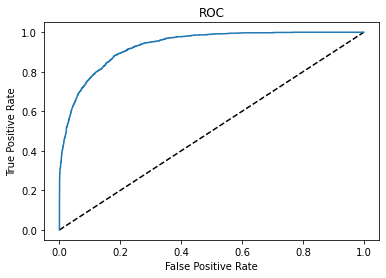

In [1055]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# Saving the model

In [1056]:
import joblib

In [1057]:
joblib.dump(gd_final,'census_income.obj')

['census_income.obj']

# Conclusion

We were successfully able to train our model to predict ~87.7% values correctly.

We chose GradientBoosting model as our final model.

In [1058]:
model = joblib.load('census_income.obj')
result = model.predict(x_test)
accuracy_score(y_test,result)

0.877047502047502

In [1059]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':result})

In [1060]:
#Printing the final result

predicted_values

,Actual,Predicted
24337,0,0
17049,0,1
21016,0,0
2790,0,0
13511,0,0
...,...,...
24667,0,0
9002,0,0
27169,0,0
5072,1,1
